In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "cm"  # cm = Computer Modern

#### Individual populations

[[3.33179717e+001 2.12765957e+001 1.56594467e+000]
 [5.92166005e-086 2.43902439e+001 2.42788062e-087]
 [1.55703394e-021 1.99999955e-197 7.78517142e+175]
 [3.03370961e-119 1.14063815e-197 2.65965996e+078]]


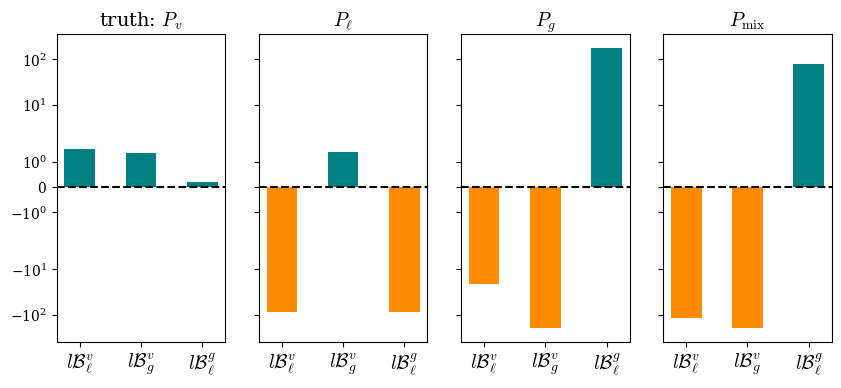

In [2]:
Npop = 1000
file_vac = f"Hierarchical_Npop_{Npop}_f_0.0_Gdot_0.0_K_0.005_alpha_0.0_beta_0.0"
file_loc = f"Hierarchical_Npop_{Npop}_f_0.5_Gdot_0.0_K_0.005_alpha_0.0_beta_0.0"
file_glob = f"Hierarchical_Npop_{Npop}_f_0.0_Gdot_1e-12_K_0.005_alpha_0.0_beta_0.0"
file_mix = f"Hierarchical_Npop_{Npop}_f_0.5_Gdot_1e-12_K_0.005_alpha_0.0_beta_0.0"

SD_ratios = []
for file in [file_vac,file_loc,file_glob,file_mix]:
    SD_ratios.append(np.loadtxt(f"{file}/SD_ratios.txt"))

SD_ratios = np.array(SD_ratios)[:,:]
print(SD_ratios)

plot_title = [r'truth: $P_v$', r'$P_\ell$', r'$P_g$', r'$P_{\rm mix}$']
x_labels = [r'$l\mathcal{B}^v_\ell$', r'$l\mathcal{B}^v_g$', r'$l\mathcal{B}^g_\ell$']#, r'${\rm loc}/{\rm glob}$']  # Names for different ratios

bar_width = 0.2

fig, axs = plt.subplots(1,4,figsize=(10,4),sharey=True)
plt.subplots_adjust(wspace=0.2)
for i, ax in enumerate(axs):
    for j in range(len(SD_ratios[0])):
        if np.log(SD_ratios[i,j])>0.0:
            ax.bar(j, np.log10((SD_ratios[i,j])),width=0.5,color='teal')
        else:
            ax.bar(j, np.log10((SD_ratios[i,j])),width=0.5,color='darkorange')
    ax.set_yscale('symlog')
    #if i == 0:
    #    ax.set_ylabel(r'$\log_{10}(\mathcal{B})$',fontsize=16)
    ax.axhline(0.0,color='k',linestyle='--')
    ax.set_xticks(np.arange(len(SD_ratios[0])))  # Center x-ticks
    ax.set_xticklabels(x_labels,fontsize=14)
    ax.set_title(plot_title[i], fontsize=14)

plt.savefig(f'Bayes_factors_summary_Npop_{Npop}.png',dpi=300,bbox_inches='tight')
plt.savefig(f'Bayes_factors_summary_Npop_{Npop}.pdf',dpi=300,bbox_inches='tight')
plt.show()

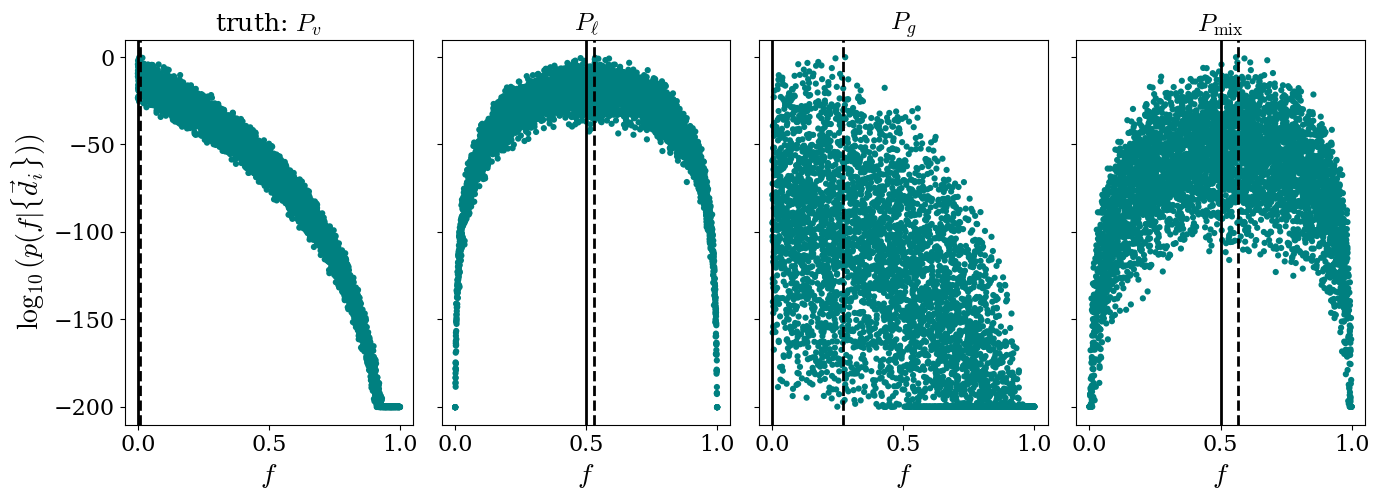

In [25]:
#plot barA_g and f hyperposteriors in each population.
import h5py 

fig, axs = plt.subplots(1,4,figsize=(16,5), sharey=True)

labels = [r"truth: $P_v$", r"$P_\ell$", r"$P_g$", r"$P_{\rm mix}$"]
f_truth = [0.0, 0.5, 0.0, 0.5]

for i, filename in enumerate([file_vac,file_loc,file_glob,file_mix]):
    exp_f = np.loadtxt(f"{filename}/expectation_f.txt")
    
    with h5py.File(f"{filename}/samples_f.h5", "r") as f:
        f_samples = f["f_samples"][:]
        f_posteriors = f["posteriors_f_samples"][:]
    
    axs[i].scatter(f_samples, np.log10(f_posteriors), alpha = 1., facecolor='teal', edgecolor='None', s=20)

    axs[i].axvline(exp_f, linestyle='--', color='k', lw=2)
    axs[i].axvline(f_truth[i], linestyle='-', color='k', lw=2)
    
    axs[i].set_title(labels[i], fontsize=18)
    axs[i].set_xlabel(r"$f$", fontsize=20)
    axs[i].tick_params(axis='both', labelsize=16)    
    #axs[i].set_ylim([-100,10])
    
plt.subplots_adjust(wspace=0.1)

axs[0].set_ylabel(r"$\log_{10}(p(f|\{\vec{d}_i\}))$", fontsize = 20)

plt.savefig("hyperposteriors_f_allpops.png", bbox_inches='tight', dpi = 300)
plt.savefig("hyperposteriors_f_allpops.pdf", bbox_inches='tight', dpi = 300)
plt.show()

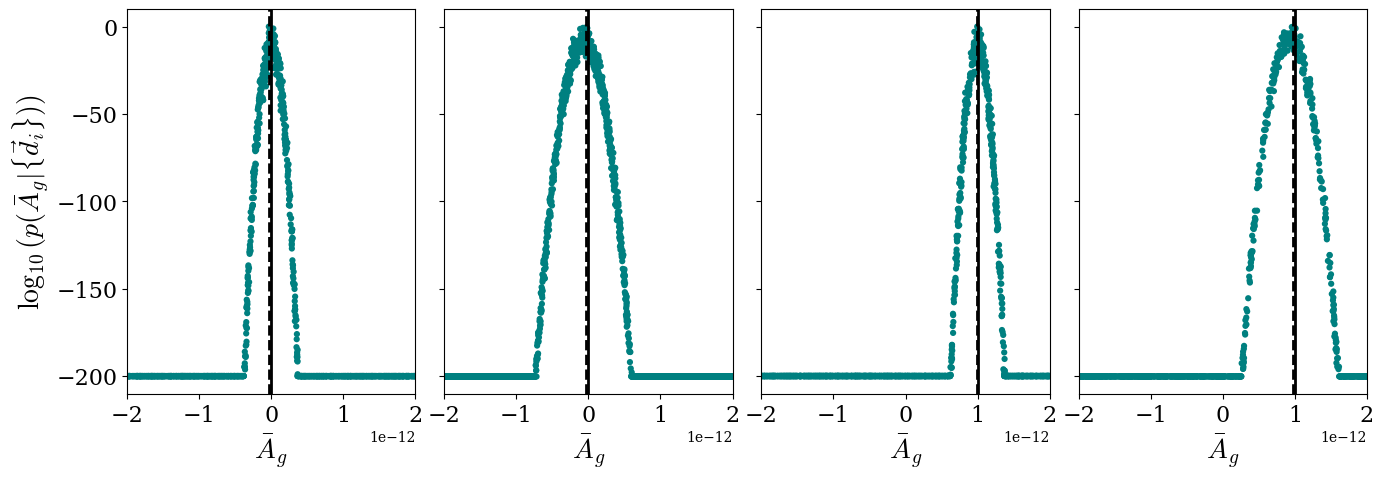

In [26]:
#plot barA_g and f hyperposteriors in each population.

fig, axs = plt.subplots(1,4,figsize=(16,5), sharey=True)

Gdot_truth = [0.0, 0.0, 1e-12, 1e-12]

for i, filename in enumerate([file_vac,file_loc,file_glob,file_mix]):
    exp_Gdot = np.loadtxt(f"{filename}/expectation_Gdot.txt")

    with h5py.File(f"{filename}/samples_Gdot.h5", "r") as f:
        Gdot_samples = f["Gdot_samples"][:]
        Gdot_posteriors = f["posteriors_Gdot_samples"][:]

    axs[i].scatter(Gdot_samples, np.log10(Gdot_posteriors), alpha = 1.0, color='teal', edgecolor='None', s=20)
    
    axs[i].axvline(exp_Gdot, linestyle='--', color='k', lw=2)
    axs[i].axvline(Gdot_truth[i], linestyle='-', color='k', lw=2)
    
    #axs[i].set_title(labels[i], fontsize=16)
    axs[i].set_xlabel(r"$\bar{A}_g$", fontsize=20)
    axs[i].set_xlim([-2e-12,2e-12])
    axs[i].tick_params(axis='both', labelsize=16)    
    #axs[i].set_ylim([-100,10])
    
plt.subplots_adjust(wspace=0.1)

axs[0].set_ylabel(r"$\log_{10}(p(\bar{A}_g|\{\vec{d}_i\}))$", fontsize = 20)
plt.savefig("hyperposteriors_Gdot_allpops.png", bbox_inches='tight', dpi = 300)
plt.savefig("hyperposteriors_Gdot_allpops.pdf", bbox_inches='tight', dpi = 300)
plt.show()

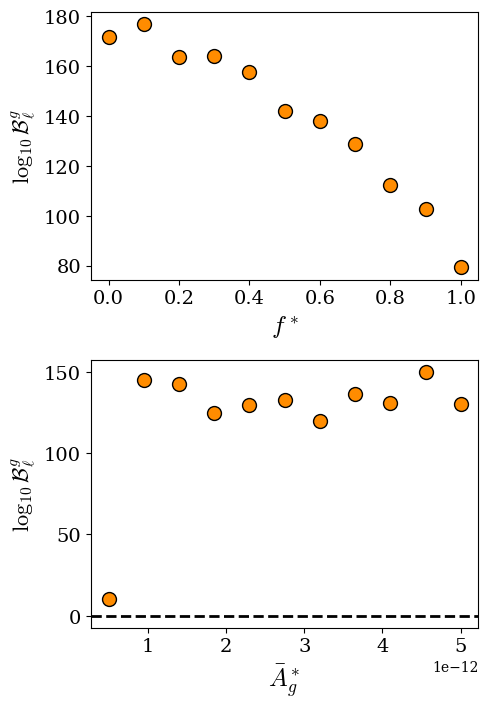

In [65]:
#load all three SDs (namely, SD^vac_loc, SD^vac_glob, SD^glob_loc)

#True size of the population
Npop_range = [
    int(5e2),
    #int(3e2), 
] #INCREASE TO 1e3 LATER?

facecolors = [
    'darkorange', 
    #'teal', 
] 

markers = [
    'o',
    '^',
]

edgecolors = [
    'black', 
    'black',
] 

alphas = [
    1.0,
    1.0,
]

N_fs = 11 #grid size over the fraction of EMRIs with a local effect

f_range = np.linspace(0.0,1.0,N_fs) #grid of fraction of EMRIs with a local effect

true_Gdot = 1e-12
true_K = 5e-3
true_alpha = 0.0
true_beta = 0.0

fig, axs = plt.subplots(2,1,figsize=(5,8))

for j in range(len(Npop_range)):

    Npop = Npop_range[j]

    parent_filename = f'Hierarchical_Npop_{Npop}_varied_f_fmax_{f_range[-1]}_Gdot_{true_Gdot}_K_{true_K}_alpha_{true_alpha}_beta_{true_beta}'

    savage_dickeys_variedf = {}
    
    for i in range(len(f_range)):    
        
        f = f_range[i]
    
        filename = parent_filename + f'/f_{f}' #folder with all the analysis data and plots
        
        savage_dickeys_variedf[f'{f}'] = np.loadtxt(f'{filename}/SD_ratios.txt')

    axs[0].scatter(f_range, np.log10(np.array(list(savage_dickeys_variedf.values()))[:,2]),facecolor=facecolors[j], edgecolor=edgecolors[j], marker = markers[j], s=100, alpha = alphas[j]) #label=r'$N_{\rm pop}$: '+f'{Npop}', )
    axs[0].tick_params(axis='both', labelsize=14)  
    
#plt.axhline(np.log10(1.0),linestyle='--',linewidth='2',color='k')
    
#axs[0].legend(fontsize=16)
#plt.yscale('symlog')
axs[0].set_xlabel(r'$f^*$',fontsize=18)
axs[0].set_ylabel(r'$\log_{10}{\mathcal{B}^{g}_{\ell}}$',fontsize=16)

N_Gdots = 11
Gdot_range = np.linspace(5e-13, 5e-12, N_Gdots)

f = 0.5
true_K = 5e-3
true_alpha = 0.0
true_beta = 0.0

for j in range(len(Npop_range)):

    Npop = Npop_range[j]

    parent_filename = f'Hierarchical_varied_Gdot_Gdotmax_{Gdot_range[-1]}_Npop_{Npop}_f_{f}_K_{true_K}_alpha_{true_alpha}_beta_{true_beta}'

    savage_dickeys_variedGdot = {}
    
    for i in range(len(Gdot_range)):    
        
        true_Gdot = Gdot_range[i]
    
        filename = parent_filename + f'/Gdot_{true_Gdot}'     
        
        savage_dickeys_variedGdot[f'{true_Gdot}'] = np.loadtxt(f'{filename}/SD_ratios.txt')

    mask = Gdot_range <= 1e-10
    
    axs[1].scatter(Gdot_range[mask], np.log10(np.array(list(savage_dickeys_variedGdot.values()))[:,2])[mask],facecolor=facecolors[j], edgecolor=edgecolors[j], marker = markers[j], s=100, label=r'$N_{\rm pop}$: '+f'{Npop}', alpha = alphas[j])
    axs[1].tick_params(axis='both', labelsize=14) 

axs[1].axhline(np.log10(1.0),linestyle='--',linewidth='2',color='k')

#axs[1].legend(fontsize=16)
#plt.xscale('log')
plt.subplots_adjust(hspace=0.3)

axs[1].set_xlabel(r'$\bar{A}^*_g$',fontsize=18)
axs[1].set_ylabel(r'$\log_{10}{\mathcal{B}^{g}_{\ell}}$',fontsize=16)

plt.savefig(f'SD_trends_summary.png', dpi=300, bbox_inches='tight')
plt.savefig(f'SD_trends_summary.pdf', dpi=300, bbox_inches='tight')
plt.show()

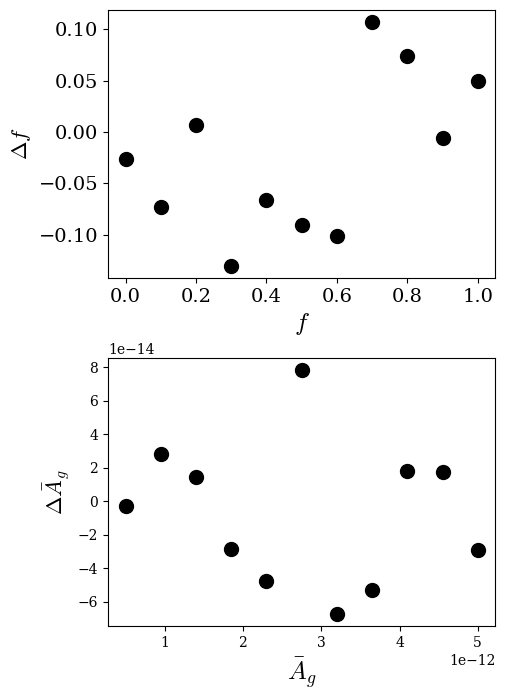

In [61]:
#load all three SDs (namely, SD^vac_loc, SD^vac_glob, SD^glob_loc)

#True size of the population
Npop_range = [
    int(5e2),
    #int(3e2), 
] #INCREASE TO 1e3 LATER?

facecolors = [
    'darkorange', 
    #'teal', 
] 

markers = [
    'o',
    '^',
]

edgecolors = [
    'black', 
    'black',
] 

alphas = [
    1.0,
    1.0,
]

N_fs = 11 #grid size over the fraction of EMRIs with a local effect

f_range = np.linspace(0.0,1.0,N_fs) #grid of fraction of EMRIs with a local effect

true_Gdot = 1e-12
true_K = 5e-3
true_alpha = 0.0
true_beta = 0.0

fig, axs = plt.subplots(2,1,figsize=(5,8))

for j in range(len(Npop_range)):

    Npop = Npop_range[j]

    parent_filename = f'Hierarchical_Npop_{Npop}_varied_f_fmax_{f_range[-1]}_Gdot_{true_Gdot}_K_{true_K}_alpha_{true_alpha}_beta_{true_beta}'

    for i in range(len(f_range)):    
        
        true_f = f_range[i]
        
        filename = parent_filename + f'/f_{true_f}' #folder with all the analysis data and plots
        exp_f = np.loadtxt(f"{filename}/expectation_f.txt")
        
        axs[0].scatter(true_f, true_f - exp_f, color = 'k', s=100)

    axs[0].tick_params(axis='both', labelsize=14) 
    
#plt.axhline(np.log10(1.0),linestyle='--',linewidth='2',color='k')
    
#axs[0].legend(fontsize=16)
#plt.yscale('symlog')
axs[0].set_xlabel(r'$f$',fontsize=18)
axs[0].set_ylabel(r'$\Delta f$',fontsize=16)

N_Gdots = 11
Gdot_range = np.linspace(5e-13, 5e-12, N_Gdots)

f = 0.5
true_K = 5e-3
true_alpha = 0.0
true_beta = 0.0

for j in range(len(Npop_range)):

    Npop = Npop_range[j]

    parent_filename = f'Hierarchical_varied_Gdot_Gdotmax_{Gdot_range[-1]}_Npop_{Npop}_f_{f}_K_{true_K}_alpha_{true_alpha}_beta_{true_beta}'

    for i in range(len(Gdot_range)):    
        
        true_Gdot = Gdot_range[i]
        
        filename = parent_filename + f'/Gdot_{true_Gdot}'     
        exp_Gdot = np.loadtxt(f"{filename}/expectation_Gdot.txt")        
        
        axs[1].scatter(true_Gdot, true_Gdot - exp_Gdot, color = 'k', s=100)

#axs[1].axhline(np.log10(1.0),linestyle='--',linewidth='2',color='k')

#axs[1].legend(fontsize=16)
#plt.xscale('log')
plt.subplots_adjust(hspace=0.3)

axs[1].set_xlabel(r'$\bar{A}_g$',fontsize=18)
axs[1].set_ylabel(r'$\Delta\bar{A}_g$',fontsize=16)

plt.savefig(f'SD_trends_samples_summary.png', dpi=300, bbox_inches='tight')
plt.savefig(f'SD_trends_samples_summary.pdf', dpi=300, bbox_inches='tight')
plt.show()

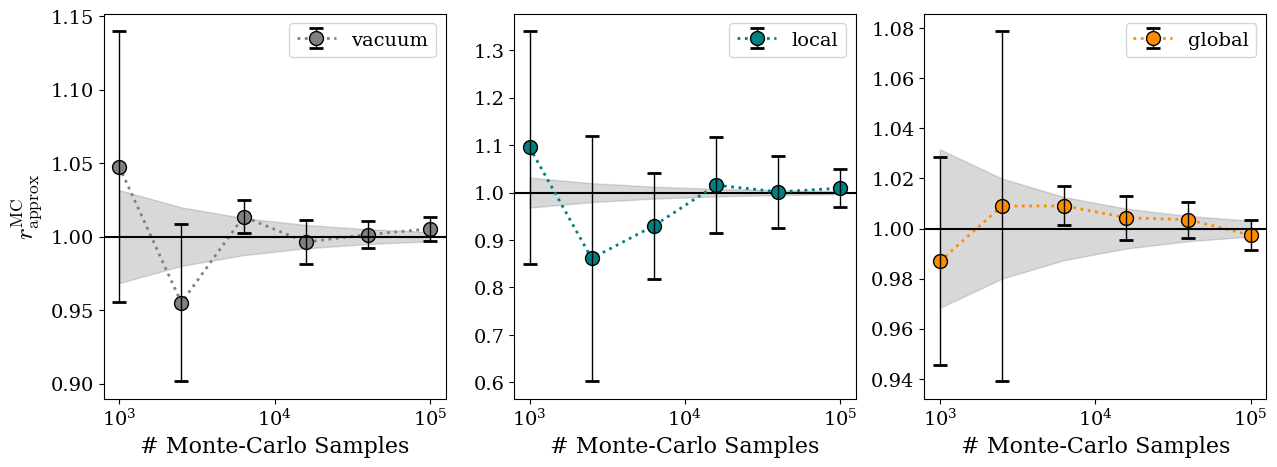

In [19]:
# integral validation

from matplotlib.ticker import FuncFormatter, NullLocator

Ngridsize = 6
Nrange = [int(1e3),int(1e5)]
Ngrid = np.geomspace(Nrange[0],Nrange[1],Ngridsize).astype(int)

hyps = ['vacuum', 'local', 'global']
colors = ['grey', 'teal', 'darkorange']
alphas = [1.0, 1.0, 1.0]
linestyles = [':',':',':']
markers = ['o','o','o']
sizes = [10, 10, 10]
zorders = [2, 3, 1]

fig, axs = plt.subplots(1,3, figsize=(15, 5))
    
for i in range(len(hyps)):
    ax = axs[i]
    
    hypothesis = hyps[i]
    filename = f'validation_{hypothesis}'
    integral_mean = np.loadtxt(f"{filename}/integral_mean.txt")
    integral_err = np.loadtxt(f"{filename}/integral_error.txt")
    ax.errorbar(Ngrid, integral_mean, yerr = integral_err, capthick=2, capsize = 5, ecolor= 'k', barsabove=True, elinewidth=1, marker=markers[i], markersize = sizes[i], linestyle=linestyles[i], linewidth=2, color=colors[i], markeredgecolor = 'black', label=hypothesis, alpha=alphas[i], zorder=zorders[i])
    # Expected sampling error bands ~ 1/sqrt(N)
    theory_error = 1.0/np.sqrt(Ngrid)
    ax.fill_between(Ngrid, 1 - theory_error, 1 + theory_error,
                     color='grey', alpha=0.3, zorder=0)
    ax.set_xscale('log')
    ax.axhline(1.0,color='k')
    ax.xaxis.set_minor_locator(NullLocator())
    # Labels and formatting
    ## Custom scientific notation formatter for *exact* Ngrid values
    formatter = FuncFormatter(lambda x, _: f"{x:.1e}")
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xlabel("# Monte-Carlo Samples", fontsize=16)
    ax.legend(fontsize=14)
    
# Save and show
axs[0].set_ylabel(r"$r^{\rm MC}_{\rm approx}$", fontsize=18)
fig.subplots_adjust(hspace=0.0, wspace=0.2)
plt.savefig(f"integral_validation.png", bbox_inches='tight', dpi=300, transparent=False)
plt.savefig(f"integral_validation.pdf", bbox_inches='tight', dpi=300, transparent=False)
plt.show()
